# Biotech Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
# Biotech Stock
symbols = ['AXSM','BBIO','KOD','ABBV','CELG','EXEL','LGND','VRTX','INCY','NVS','LLY','MGNX','CALA','AGEN','MRUS']
start = '2016-01-01'
end = '2019-01-01'

In [3]:
df = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  15 of 15 downloaded


In [4]:
#df = pd.DataFrame()
#for s in symbols:
#    df[s] = yf.download(s,start,end)['Adj Close']

In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [6]:
number_of_years = delta.years

In [7]:
days = (df.index[-1] - df.index[0]).days
days

1092

In [8]:
df.head()

,ABBV,AGEN,AXSM,CALA,CELG,EXEL,INCY,KOD,LGND,LLY,MGNX,MRUS,NVS,VRTX
2016-01-04,48.749779,4.46,12.19,7.44,117.620003,5.49,103.320000,NaN,102.470001,74.540886,29.410000,NaN,66.679474,122.889999
2016-01-05,48.546680,4.43,14.98,7.79,117.959999,5.27,103.800003,NaN,100.650002,75.656258,28.520000,NaN,67.037170,123.449997
2016-01-06,48.555145,4.25,14.47,7.04,116.709999,5.29,102.260002,NaN,102.019997,75.179520,27.620001,NaN,66.119591,122.230003
2016-01-07,48.411289,3.89,12.45,6.41,111.889999,4.93,95.760002,NaN,98.620003,73.227615,26.070000,NaN,65.272011,114.959999
2016-01-08,47.091213,3.78,11.86,5.98,108.980003,4.89,94.779999,NaN,97.919998,73.083710,24.820000,NaN,63.421318,110.709999


In [9]:
df.tail()

,ABBV,AGEN,AXSM,CALA,CELG,EXEL,INCY,KOD,LGND,LLY,MGNX,MRUS,NVS,VRTX
2018-12-24,79.658409,2.22,2.15,3.72,59.209999,17.469999,58.500000,7.34,128.360001,104.393227,11.75,13.965,71.598831,151.910004
2018-12-26,84.277382,2.50,2.05,3.88,62.500000,18.950001,62.020000,8.22,137.860001,108.637405,12.50,13.400,73.577797,161.839996
2018-12-27,85.100853,2.39,2.00,3.78,62.810001,19.260000,62.340000,7.25,136.889999,110.397659,12.59,12.800,72.970222,162.369995
2018-12-28,86.246124,2.39,2.18,3.85,62.430000,19.440001,62.279999,6.62,135.839996,111.678741,12.61,13.730,74.003105,161.419998
2018-12-31,87.258888,2.38,2.82,4.01,64.089996,19.670000,63.590000,7.10,135.699997,113.165184,12.70,14.000,74.480492,165.710007


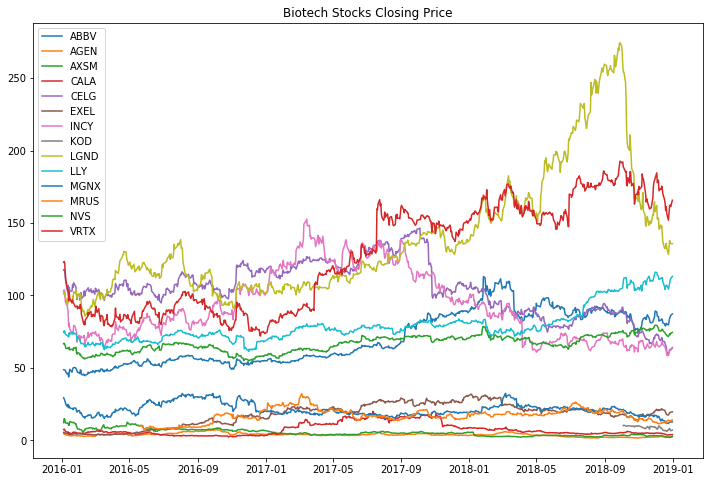

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Biotech Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

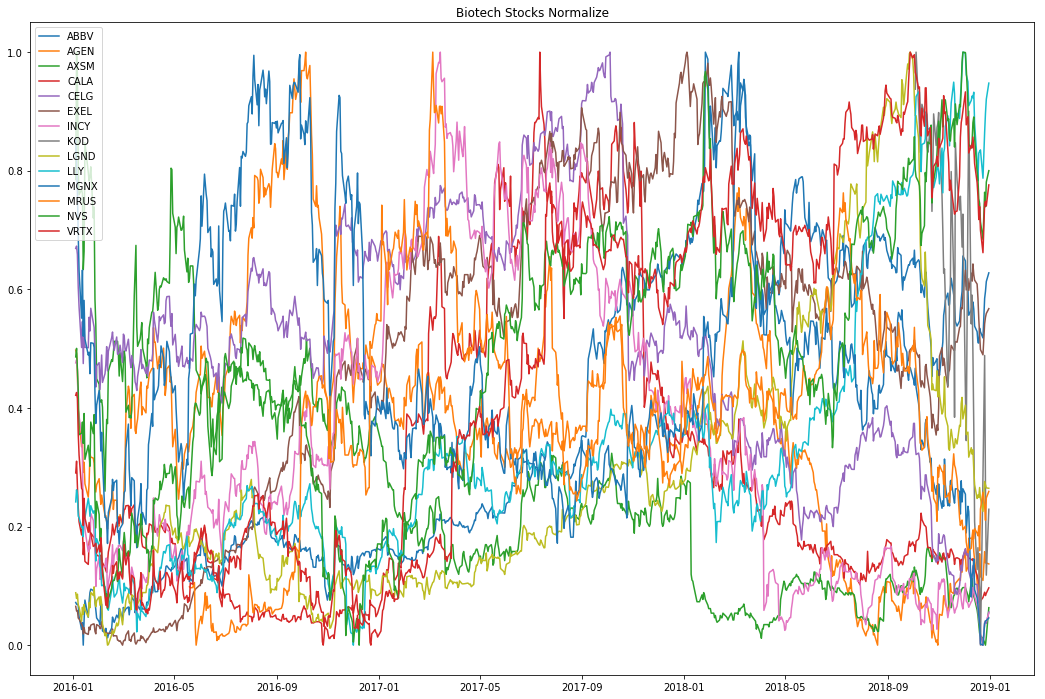

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Biotech Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

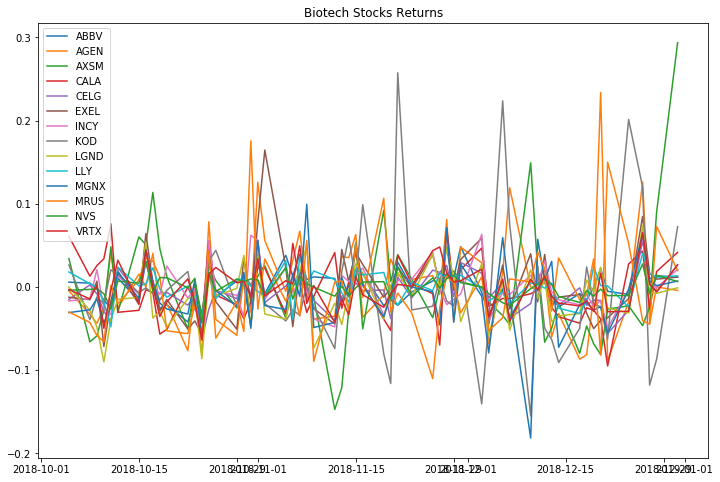

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Biotech Stocks Returns')
plt.legend(labels=stock_rets.columns)

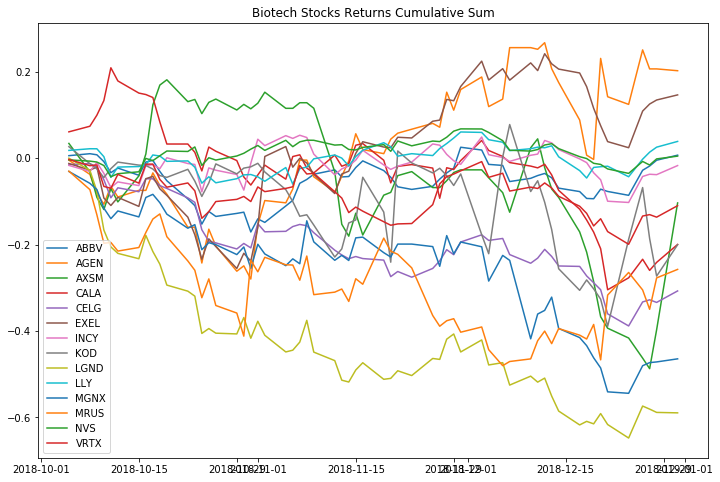

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Biotech Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

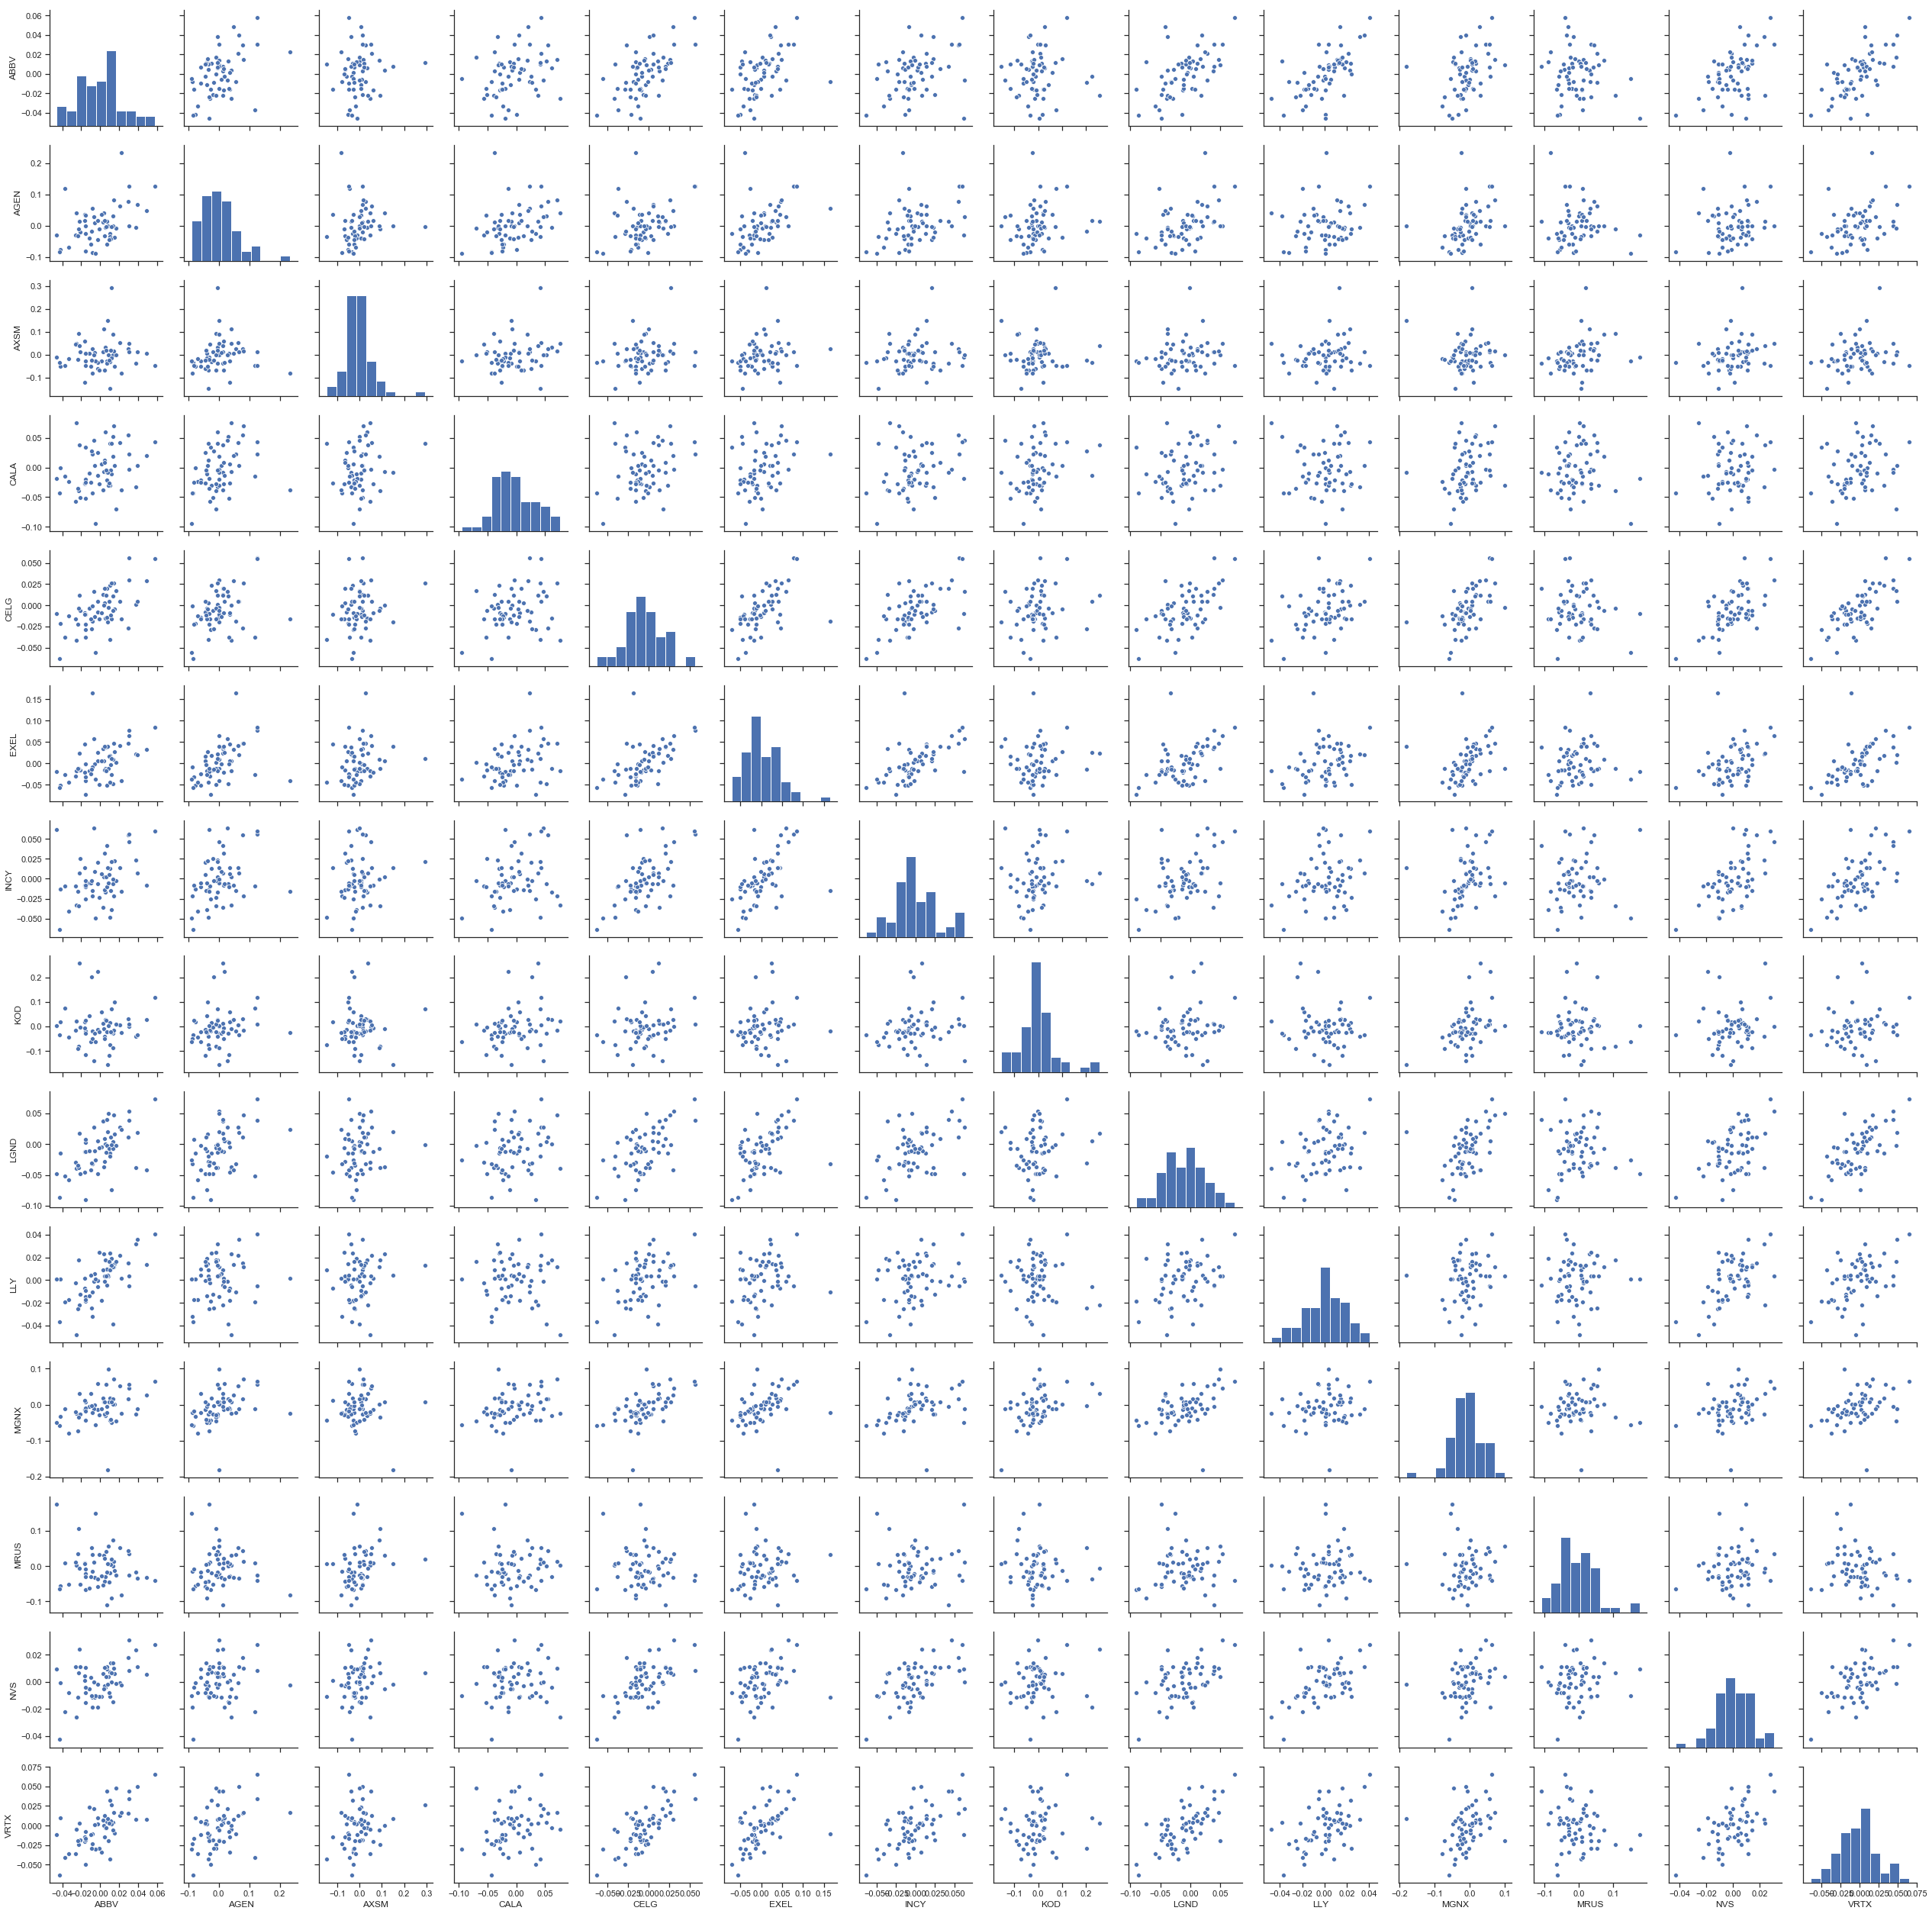

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

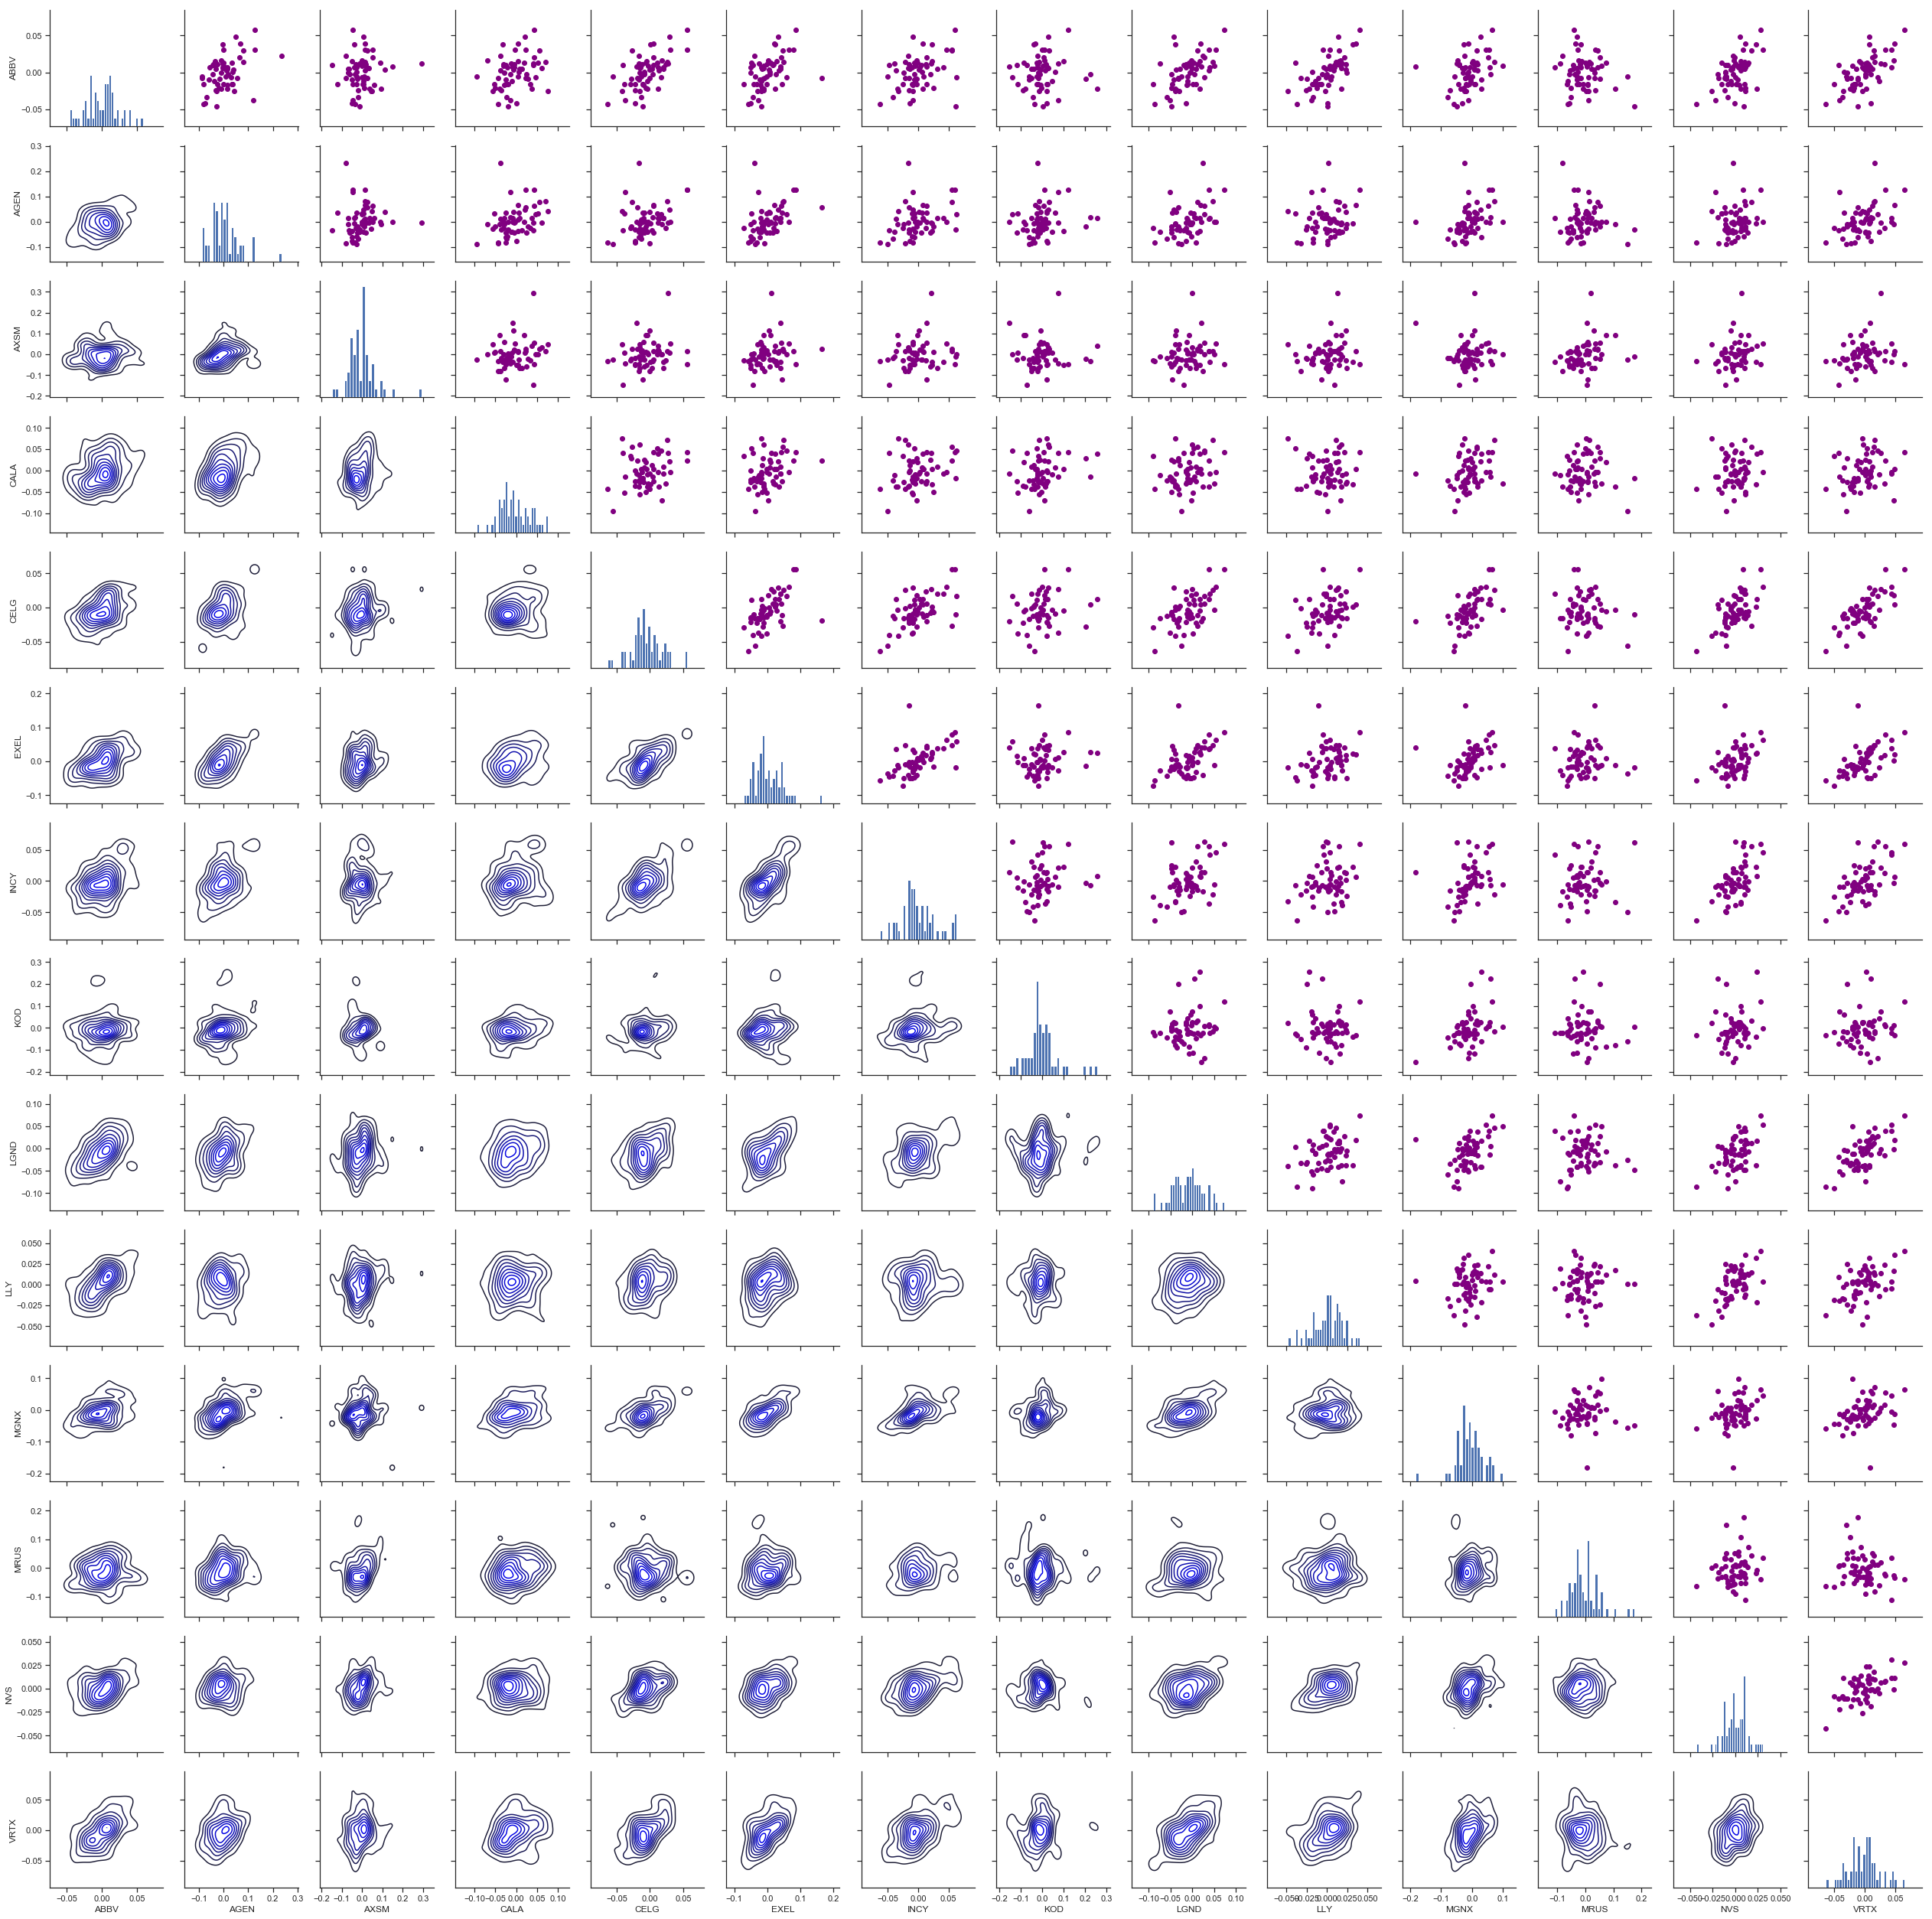

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

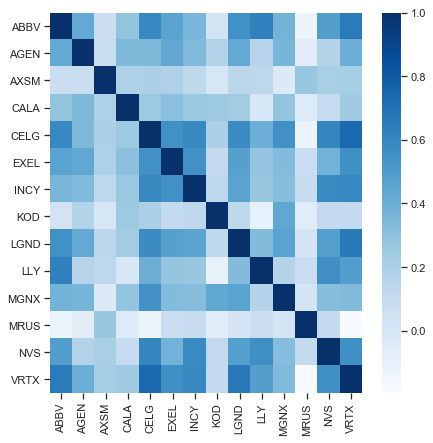

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

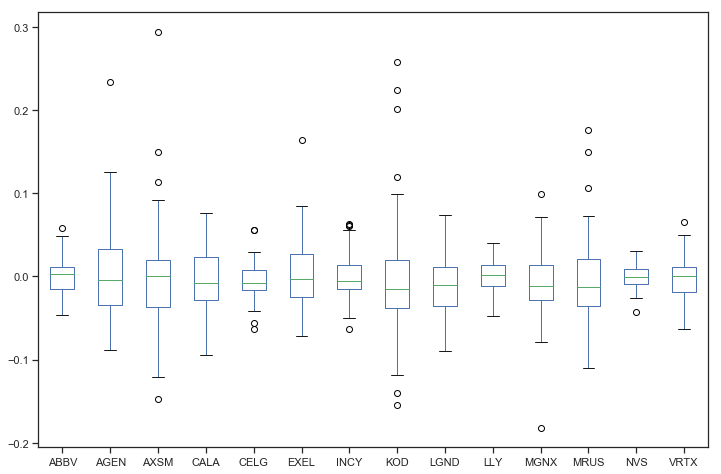

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

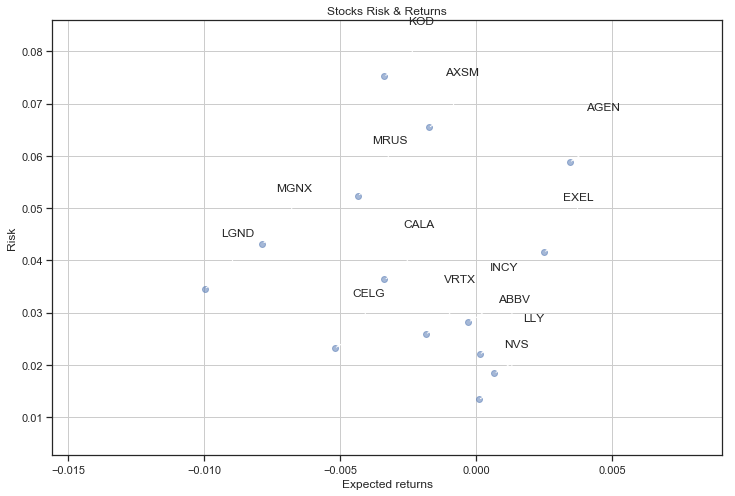

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

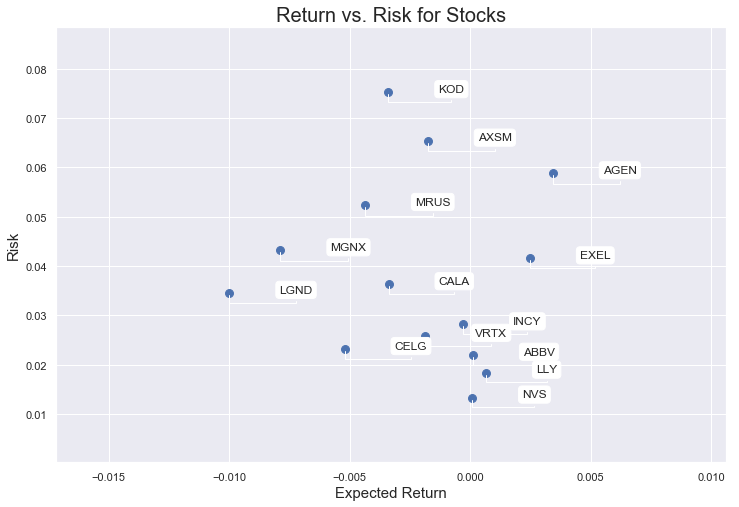

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

VRTX  VRTX    1.000000
NVS   NVS     1.000000
AGEN  AGEN    1.000000
AXSM  AXSM    1.000000
CALA  CALA    1.000000
CELG  CELG    1.000000
EXEL  EXEL    1.000000
INCY  INCY    1.000000
KOD   KOD     1.000000
LGND  LGND    1.000000
LLY   LLY     1.000000
MGNX  MGNX    1.000000
MRUS  MRUS    1.000000
ABBV  ABBV    1.000000
CELG  VRTX    0.735707
VRTX  CELG    0.735707
      LGND    0.664595
LGND  VRTX    0.664595
ABBV  VRTX    0.654258
VRTX  ABBV    0.654258
LLY   ABBV    0.634248
ABBV  LLY     0.634248
CELG  NVS     0.607962
NVS   CELG    0.607962
ABBV  CELG    0.598175
CELG  ABBV    0.598175
VRTX  INCY    0.597989
INCY  VRTX    0.597989
CELG  INCY    0.592354
INCY  CELG    0.592354
                ...   
MRUS  INCY    0.102754
INCY  MRUS    0.102754
LLY   KOD     0.101754
KOD   LLY     0.101754
AGEN  AXSM    0.087025
AXSM  AGEN    0.087025
ABBV  AXSM    0.074573
AXSM  ABBV    0.074573
LLY   MRUS    0.073959
MRUS  LLY     0.073959
EXEL  MRUS    0.071352
MRUS  EXEL    0.071352
      AGEN 

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,ABBV,AGEN,AXSM,CALA,CELG,EXEL,INCY,KOD,LGND,LLY,MGNX,MRUS,NVS,VRTX
2018-10-05,0.496934,0.260546,0.411413,0.912454,0.405407,0.250824,0.367630,0.440288,0.548427,0.743807,0.536610,0.280429,0.526441,0.469781
2018-10-08,0.485389,0.173144,0.184530,0.631872,0.552197,0.238152,0.389629,0.280529,0.377737,0.584142,0.548552,0.236645,0.540520,0.381482
2018-10-09,0.417127,0.139580,0.200659,0.705798,0.461232,0.332349,0.663593,0.346809,0.254886,0.539971,0.595148,0.181917,0.551555,0.506596
2018-10-10,0.289753,0.196344,0.270291,0.754223,0.286939,0.000000,0.301162,0.326862,0.000000,0.334588,0.492468,0.155004,0.470083,0.107777
2018-10-11,0.195230,0.404217,0.443488,1.000000,0.181198,0.229940,0.240395,0.425845,0.311657,0.000000,0.560285,0.392362,0.227780,0.459374


In [24]:
Normalized_Value.corr()

,ABBV,AGEN,AXSM,CALA,CELG,EXEL,INCY,KOD,LGND,LLY,MGNX,MRUS,NVS,VRTX
ABBV,1.000000,0.427637,0.074573,0.285213,0.598175,0.465816,0.356005,0.024933,0.554322,0.634248,0.376768,-0.127805,0.488510,0.654258
AGEN,0.427637,1.000000,0.087025,0.342340,0.345060,0.436806,0.337058,0.173264,0.428031,0.159665,0.364712,-0.065702,0.172740,0.398961
AXSM,0.074573,0.087025,1.000000,0.189099,0.199882,0.196105,0.135618,-0.002330,0.144460,0.137731,-0.029837,0.266485,0.210610,0.222292
CALA,0.285213,0.342340,0.189099,1.000000,0.254609,0.310993,0.265098,0.253076,0.234095,-0.006927,0.282364,-0.038613,0.106105,0.241100
CELG,0.598175,0.345060,0.199882,0.254609,1.000000,0.553212,0.592354,0.197497,0.577354,0.400445,0.553380,-0.128139,0.607962,0.735707
EXEL,0.465816,0.436806,0.196105,0.310993,0.553212,1.000000,0.552299,0.109840,0.479638,0.282657,0.334307,0.071352,0.378964,0.557054
INCY,0.356005,0.337058,0.135618,0.265098,0.592354,0.552299,1.000000,0.137852,0.457564,0.267662,0.319333,0.102754,0.588543,0.597989
KOD,0.024933,0.173264,-0.002330,0.253076,0.197497,0.109840,0.137852,1.000000,0.132109,-0.101754,0.443014,-0.057635,0.114513,0.111953
LGND,0.554322,0.428031,0.144460,0.234095,0.577354,0.479638,0.457564,0.132109,1.000000,0.334433,0.464213,0.015236,0.482527,0.664595
LLY,0.634248,0.159665,0.137731,-0.006927,0.400445,0.282657,0.267662,-0.101754,0.334433,1.000000,0.167876,0.073959,0.560906,0.489926


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

VRTX  VRTX    1.000000
NVS   NVS     1.000000
AGEN  AGEN    1.000000
AXSM  AXSM    1.000000
CALA  CALA    1.000000
CELG  CELG    1.000000
EXEL  EXEL    1.000000
INCY  INCY    1.000000
KOD   KOD     1.000000
LGND  LGND    1.000000
LLY   LLY     1.000000
MGNX  MGNX    1.000000
MRUS  MRUS    1.000000
ABBV  ABBV    1.000000
CELG  VRTX    0.735707
VRTX  CELG    0.735707
      LGND    0.664595
LGND  VRTX    0.664595
ABBV  VRTX    0.654258
VRTX  ABBV    0.654258
LLY   ABBV    0.634248
ABBV  LLY     0.634248
CELG  NVS     0.607962
NVS   CELG    0.607962
ABBV  CELG    0.598175
CELG  ABBV    0.598175
VRTX  INCY    0.597989
INCY  VRTX    0.597989
CELG  INCY    0.592354
INCY  CELG    0.592354
                ...   
MRUS  INCY    0.102754
INCY  MRUS    0.102754
LLY   KOD     0.101754
KOD   LLY     0.101754
AGEN  AXSM    0.087025
AXSM  AGEN    0.087025
ABBV  AXSM    0.074573
AXSM  ABBV    0.074573
LLY   MRUS    0.073959
MRUS  LLY     0.073959
EXEL  MRUS    0.071352
MRUS  EXEL    0.071352
      AGEN 

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ABBV    0.000118
AGEN    0.003431
AXSM   -0.001757
CALA   -0.003385
CELG   -0.005209
EXEL    0.002482
INCY   -0.000291
KOD    -0.003397
LGND   -0.009992
LLY     0.000657
MGNX   -0.007873
MRUS   -0.004364
NVS     0.000080
VRTX   -0.001864
dtype: float64
--------------------------------------------------
Stock risks:
ABBV    0.022021
AGEN    0.058816
AXSM    0.065432
CALA    0.036324
CELG    0.023185
EXEL    0.041567
INCY    0.028192
KOD     0.075263
LGND    0.034577
LLY     0.018396
MGNX    0.043203
MRUS    0.052393
NVS     0.013347
VRTX    0.025864
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
LGND,-0.009992,0.034577
MGNX,-0.007873,0.043203
CELG,-0.005209,0.023185
MRUS,-0.004364,0.052393
KOD,-0.003397,0.075263
CALA,-0.003385,0.036324
VRTX,-0.001864,0.025864
AXSM,-0.001757,0.065432
INCY,-0.000291,0.028192
NVS,0.000080,0.013347


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
NVS,0.000080,0.013347
LLY,0.000657,0.018396
ABBV,0.000118,0.022021
CELG,-0.005209,0.023185
VRTX,-0.001864,0.025864
INCY,-0.000291,0.028192
LGND,-0.009992,0.034577
CALA,-0.003385,0.036324
EXEL,0.002482,0.041567
MGNX,-0.007873,0.043203


In [29]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
ABBV,0.000118,0.022021,-0.448765
AGEN,0.003431,0.058816,-0.111694
AXSM,-0.001757,0.065432,-0.179680
CALA,-0.003385,0.036324,-0.368482
CELG,-0.005209,0.023185,-0.655988
EXEL,0.002482,0.041567,-0.180867
INCY,-0.000291,0.028192,-0.365033
KOD,-0.003397,0.075263,-0.178010
LGND,-0.009992,0.034577,-0.578186
LLY,0.000657,0.018396,-0.507891


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
ABBV,0.000118,0.022021,-0.448765,0.057985,-0.045839,0.002827,1.174272
AGEN,0.003431,0.058816,-0.111694,0.233831,-0.088710,-0.003802,-0.418410
AXSM,-0.001757,0.065432,-0.179680,0.293578,-0.147287,0.000000,29.357798
CALA,-0.003385,0.036324,-0.368482,0.075862,-0.095000,-0.008147,4.155844
CELG,-0.005209,0.023185,-0.655988,0.056006,-0.063432,-0.008344,2.658972
EXEL,0.002482,0.041567,-0.180867,0.164548,-0.071551,-0.003043,1.183122
INCY,-0.000291,0.028192,-0.365033,0.063346,-0.063346,-0.005289,2.103406
KOD,-0.003397,0.075263,-0.178010,0.257400,-0.155000,-0.015167,7.250755
LGND,-0.009992,0.034577,-0.578186,0.074011,-0.090059,-0.010718,-0.103062
LLY,0.000657,0.018396,-0.507891,0.040656,-0.047909,0.001650,1.330999


In [34]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
ABBV,0.000118,0.022021,-0.448765,0.057985,-0.045839,0.002827,1.174272,0.003899
AGEN,0.003431,0.058816,-0.111694,0.233831,-0.088710,-0.003802,-0.418410,-0.001397
AXSM,-0.001757,0.065432,-0.179680,0.293578,-0.147287,0.000000,29.357798,0.089593
CALA,-0.003385,0.036324,-0.368482,0.075862,-0.095000,-0.008147,4.155844,0.013665
CELG,-0.005209,0.023185,-0.655988,0.056006,-0.063432,-0.008344,2.658972,0.008786
EXEL,0.002482,0.041567,-0.180867,0.164548,-0.071551,-0.003043,1.183122,0.003928
INCY,-0.000291,0.028192,-0.365033,0.063346,-0.063346,-0.005289,2.103406,0.006963
KOD,-0.003397,0.075263,-0.178010,0.257400,-0.155000,-0.015167,7.250755,0.023607
LGND,-0.009992,0.034577,-0.578186,0.074011,-0.090059,-0.010718,-0.103062,-0.000344
LLY,0.000657,0.018396,-0.507891,0.040656,-0.047909,0.001650,1.330999,0.004417


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
ABBV,0.000118,0.022021,-0.448765,0.057985,-0.045839,0.002827,1.174272,0.003899,0.143792
AGEN,0.003431,0.058816,-0.111694,0.233831,-0.088710,-0.003802,-0.418410,-0.001397,-0.134921
AXSM,-0.001757,0.065432,-0.179680,0.293578,-0.147287,0.000000,29.357798,0.089593,-0.286675
CALA,-0.003385,0.036324,-0.368482,0.075862,-0.095000,-0.008147,4.155844,0.013665,-0.132928
CELG,-0.005209,0.023185,-0.655988,0.056006,-0.063432,-0.008344,2.658972,0.008786,-0.130743
EXEL,0.002482,0.041567,-0.180867,0.164548,-0.071551,-0.003043,1.183122,0.003928,0.342455
INCY,-0.000291,0.028192,-0.365033,0.063346,-0.063346,-0.005289,2.103406,0.006963,-0.105964
KOD,-0.003397,0.075263,-0.178010,0.257400,-0.155000,-0.015167,7.250755,0.023607,NaN
LGND,-0.009992,0.034577,-0.578186,0.074011,-0.090059,-0.010718,-0.103062,-0.000344,0.066964
LLY,0.000657,0.018396,-0.507891,0.040656,-0.047909,0.001650,1.330999,0.004417,0.101140


In [36]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AGEN,0.003431,0.058816,-0.111694,0.233831,-0.088710,-0.003802,-0.418410,-0.001397,-0.134921
LGND,-0.009992,0.034577,-0.578186,0.074011,-0.090059,-0.010718,-0.103062,-0.000344,0.066964
NVS,0.000080,0.013347,-0.743256,0.030908,-0.042722,-0.000224,0.645090,0.002146,0.025861
MGNX,-0.007873,0.043203,-0.413701,0.099398,-0.181597,-0.011316,0.713719,0.002373,-0.176165
ABBV,0.000118,0.022021,-0.448765,0.057985,-0.045839,0.002827,1.174272,0.003899,0.143792
EXEL,0.002482,0.041567,-0.180867,0.164548,-0.071551,-0.003043,1.183122,0.003928,0.342455
LLY,0.000657,0.018396,-0.507891,0.040656,-0.047909,0.001650,1.330999,0.004417,0.101140
MRUS,-0.004364,0.052393,-0.274157,0.175549,-0.110269,-0.012640,1.966497,0.006512,NaN
INCY,-0.000291,0.028192,-0.365033,0.063346,-0.063346,-0.005289,2.103406,0.006963,-0.105964
VRTX,-0.001864,0.025864,-0.458699,0.065368,-0.063616,0.000162,2.657669,0.008782,0.071424
